# Baseball Players Salary Analysis

## Questions

Some questions I would like to answer with this data:
1. How has MLB player salaries evolved over the years?
2. Between hits, home runs, or runs batted in, which one has the highest correlation with batter salaries?
3. Between, earned run average, wins, or strikeouts, which one has the highest correlation with pitcher salary?

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Salaries Data

In [2]:
salaries_df = pd.read_csv('/content/drive/MyDrive/Proyek analisis data/baseballdatabank-2023.1/contrib/Salaries.csv')
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [3]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    26428 non-null  int64 
 1   teamID    26428 non-null  object
 2   lgID      26428 non-null  object
 3   playerID  26428 non-null  object
 4   salary    26428 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [4]:
salaries_df.rename(columns={'lgID': 'league'}, inplace=True)
salaries_df['league'].replace({'AL': 'American League', 'NL': 'National League'}, inplace=True)
salaries_df.drop(columns='teamID', inplace=True)

In [5]:
print('Number of duplicated data:', salaries_df.duplicated().sum())

Number of duplicated data: 5


### Batting Data

In [6]:
batting_df = pd.read_csv('/content/drive/MyDrive/Proyek analisis data/baseballdatabank-2023.1/core/Batting.csv')
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [7]:
print('Number of duplicated data:', batting_df.duplicated().sum())

Number of duplicated data: 0


I would like to modify the batting dataframe to contain only the required data.

In [8]:
batting_df = batting_df[['playerID', 'yearID', 'RBI', 'H', 'HR']]
batting_df.rename(columns={
    'RBI':'runs_batted_in',
    'H':'hits',
    'HR':'homerun'
}, inplace=True)
batting_df.sample(5)

<ipython-input-8-acf66dbf0ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_df.rename(columns={


,playerID,yearID,runs_batted_in,hits,homerun
2533,orourji01,1884,63.0,162,5
6748,doyleja01,1896,101.0,165,1
92933,bayja01,2010,47.0,90,6
1486,dunlafr01,1882,28.0,102,0
77370,martida01,1998,20.0,79,3


In [9]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112184 entries, 0 to 112183
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   playerID        112184 non-null  object 
 1   yearID          112184 non-null  int64  
 2   runs_batted_in  111428 non-null  float64
 3   hits            112184 non-null  int64  
 4   homerun         112184 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.3+ MB


There is some missing data in runs_batted_in column, so I will delete data that has missing values ​​in runs_batted_in column.

In [10]:
batting_df = batting_df.dropna(subset='runs_batted_in')
batting_df.isnull().sum()

playerID          0
yearID            0
runs_batted_in    0
hits              0
homerun           0
dtype: int64

In [11]:
# batting_df[batting_df['games'] < 100]

Merge with salary data

In [12]:
batter_salary = batting_df.merge(salaries_df, on=['playerID','yearID'], how='inner')
batter_salary.head()

,playerID,yearID,runs_batted_in,hits,homerun,league,salary
0,ackerji01,1985,0.0,0,0,American League,170000
1,agostju01,1985,0.0,0,0,American League,147500
2,aguaylu01,1985,21.0,46,6,National League,237000
3,alexado01,1985,0.0,0,0,American League,875000
4,allenne01,1985,0.0,0,0,National League,750000


In [13]:
batter_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28294 entries, 0 to 28293
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerID        28294 non-null  object 
 1   yearID          28294 non-null  int64  
 2   runs_batted_in  28294 non-null  float64
 3   hits            28294 non-null  int64  
 4   homerun         28294 non-null  int64  
 5   league          28294 non-null  object 
 6   salary          28294 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.7+ MB


### Pitching Data

In [14]:
pitching_df = pd.read_csv('/content/drive/MyDrive/Proyek analisis data/baseballdatabank-2023.1/core/Pitching.csv')
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [15]:
print('Number of duplicated data: ', pitching_df.duplicated().sum())

Number of duplicated data:  0


I would also like to modify the pitching dataframe by removing unneeded data.

In [16]:
pitching_df = pitching_df[['playerID', 'yearID', 'ERA', 'W', 'SO']]
pitching_df.rename(columns={
    'ERA':'earned_run_average',
    'W':'wins',
    'SO':'strikeouts'
}, inplace=True)
pitching_df.sample(5)

,playerID,yearID,earned_run_average,wins,strikeouts
30288,reedri01,1995,5.82,0,10
17989,millest01,1966,2.25,9,67
2372,swaimcy01,1897,4.60,9,52
28611,morgami01,1992,2.55,16,123
10148,sivespe01,1936,4.57,3,22


In [17]:
pitching_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50402 entries, 0 to 50401
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   playerID            50402 non-null  object 
 1   yearID              50402 non-null  int64  
 2   earned_run_average  50305 non-null  float64
 3   wins                50402 non-null  int64  
 4   strikeouts          50402 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


I will delete the data whose value is missing in the earned_run_average column.

In [18]:
pitching_df = pitching_df.dropna(subset='earned_run_average')
pitching_df.isnull().sum()

playerID              0
yearID                0
earned_run_average    0
wins                  0
strikeouts            0
dtype: int64

In [19]:
# pitching_df[(pitching_df['outs_pitched'] / 3) < 120]

Merge with salary data

In [20]:
pitcher_salary = pitching_df.merge(salaries_df, on=['playerID','yearID'], how='inner')
pitcher_salary.head()

,playerID,yearID,earned_run_average,wins,strikeouts,league,salary
0,ackerji01,1985,3.23,7,42,American League,170000
1,agostju01,1985,3.58,4,39,American League,147500
2,alexado01,1985,3.45,17,142,American League,875000
3,allenne01,1985,5.59,1,10,National League,750000
4,allenne01,1985,2.76,1,16,National League,750000


In [21]:
pitcher_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13359 entries, 0 to 13358
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   playerID            13359 non-null  object 
 1   yearID              13359 non-null  int64  
 2   earned_run_average  13359 non-null  float64
 3   wins                13359 non-null  int64  
 4   strikeouts          13359 non-null  int64  
 5   league              13359 non-null  object 
 6   salary              13359 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 834.9+ KB


All data is ready for analysis.

## Exploratory Data Analysis

Previously, I wanted to look at the distribution of salary data to find out the distribution of players' salaries.

In [31]:
color = '#002D72'
color2 = '#D50032'
color3 = '#6B1752'

Text(0.5, 1.0, "Distribution of Players' Salary")

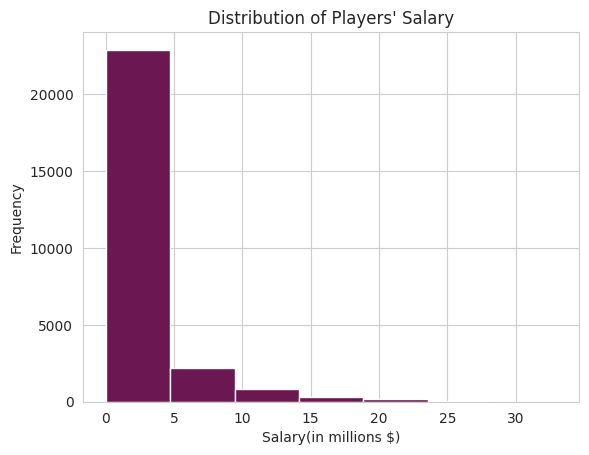

In [32]:
plt.hist(salaries_df['salary']/1e6, bins=7, color=color3)
plt.xlabel('Salary(in millions $)')
plt.ylabel('Frequency')
plt.title('Distribution of Players\' Salary')

Most players have a salary range below 4.7 million USD, most are next with a salary range of 4.7 to 9.5 million USD, and a small percentage of players with the highest salary range of about 24 to 28 million USD.

### Question 1: How has MLB player salaries evolved over the years?

Text(0.5, 1.0, 'Average Player Salary per Year')

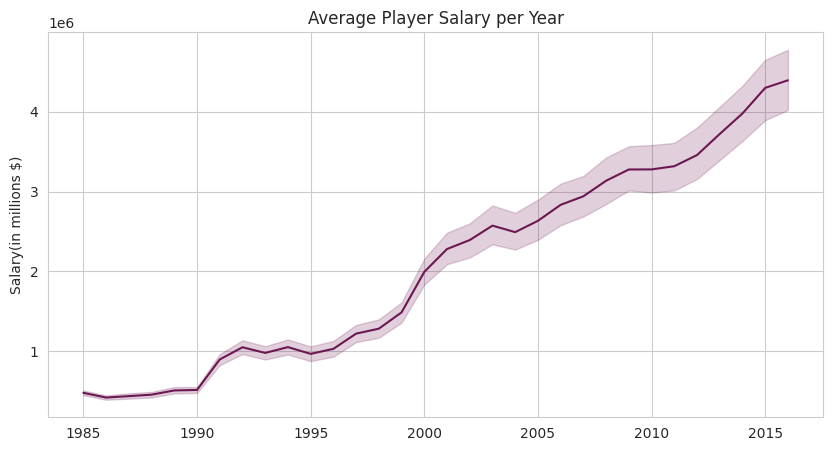

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.lineplot(data=salaries_df, x='yearID', y='salary', markers=True, color=color3)
plt.xlabel(None)
plt.ylabel('Salary(in millions $)')
plt.title('Average Player Salary per Year')

Let's group them by league.

Text(0.5, 1.0, 'Average Player Salary per Year by League')

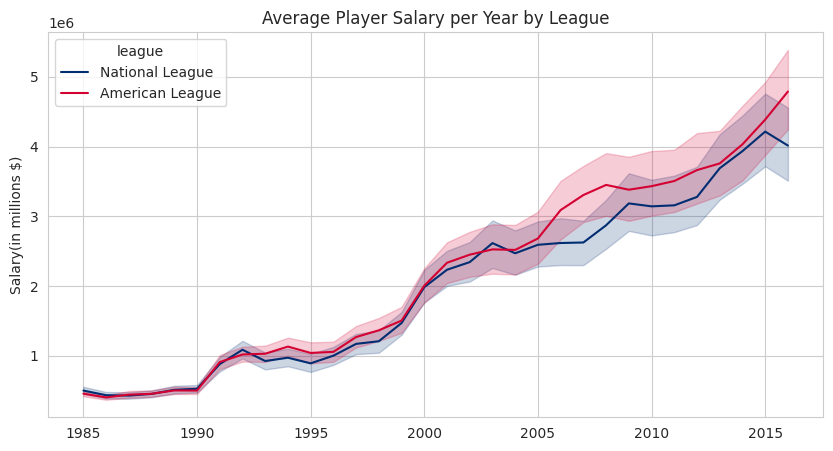

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=salaries_df, x='yearID', y='salary', hue='league', markers=True, palette=[color, color2])
plt.xlabel(None)
plt.ylabel('Salary(in millions $)')
plt.title('Average Player Salary per Year by League')

Since this is baseball player salary data, I thought using the median would be better than the average to avoid any outliers.

Text(0.5, 1.0, 'Median Player Salary per Year')

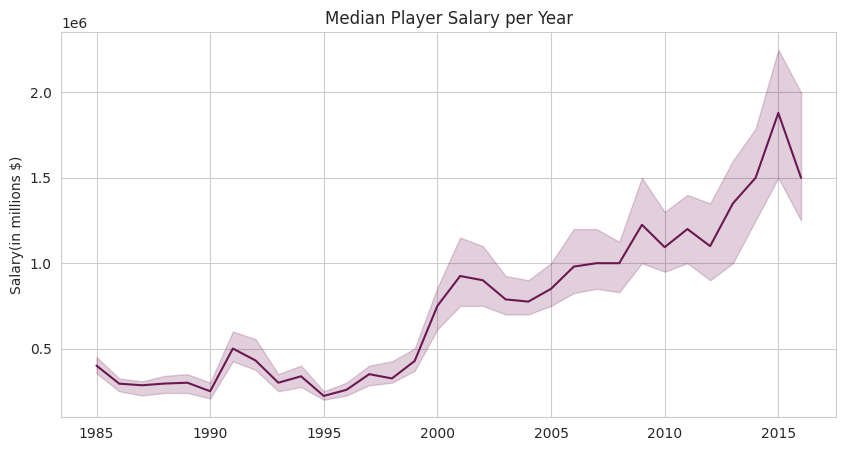

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(data=salaries_df, x='yearID', y='salary', estimator='median', markers=True, color=color3)
plt.xlabel(None)
plt.ylabel('Salary(in millions $)')
plt.title('Median Player Salary per Year')

Overall, since 1985 the median salary has nearly quadrupled, from a median of under 500,000 USD in 1985 to a median of about 1.8 million USD in 2015.

When viewed in detail, from 1985 to 1999 there was no significant growth, it doubled in 1991 from 250,000 USD to 500,000 USD, but then fell again. Until in 2000 it began to increase quite consistently, and between 2012 and 2015 there was a significant increase from 1.1 million USD to 1.9 million USD, then fell to 1.5 million USD in 2016.

Text(0.5, 1.0, 'Median Player Salary per Year by League')

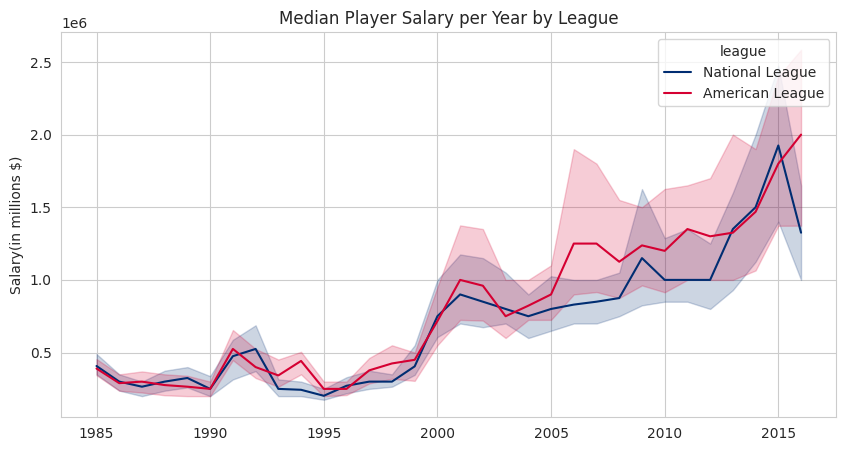

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=salaries_df, x='yearID', y='salary', estimator='median', hue='league', markers=True, palette=[color, color2])
plt.xlabel(None)
plt.ylabel('Salary(in millions $)')
plt.title('Median Player Salary per Year by League')

Overall *American League* salaries tend to be higher than *National League*.  He raced several times in the American League in 1989, 1992, 2003 and 2015 but still had small margins and was not consistent.  The largest salary gap between the *American League* and the *National League* occurred in 2016 at about 700,000 USD.

### Question 2: Between hits, home runs, or runs batted in, which one has the highest correlation with batter salaries?

In [28]:
def analyze(record_df, statistics_list):
    num_plots = len(statistics_list)
    fig, ax = plt.subplots(1, num_plots, figsize=(15, 5))

    for i, statistic in enumerate(statistics_list):
        x = record_df[statistic]
        y = record_df['salary'] / 1e6

        ax[i].scatter(x, y, color=color)
        ax[i].set_title('{} vs salary'.format(statistic))
        ax[i].set_ylabel('Salary (in millions $)')
        ax[i].set_xlabel('{}'.format(statistic))

        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax[i].plot(x, p(x), color=color2)
        print('The correlation between {} and salary is {:0.3f}'.format(statistic, record_df.corr()[statistic]['salary']))
    plt.tight_layout()
    plt.show()

<ipython-input-28-69ba600ccb00>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('The correlation between {} and salary is {:0.3f}'.format(statistic, record_df.corr()[statistic]['salary']))


The correlation between runs_batted_in and salary is 0.253
The correlation between hits and salary is 0.215
The correlation between homerun and salary is 0.276


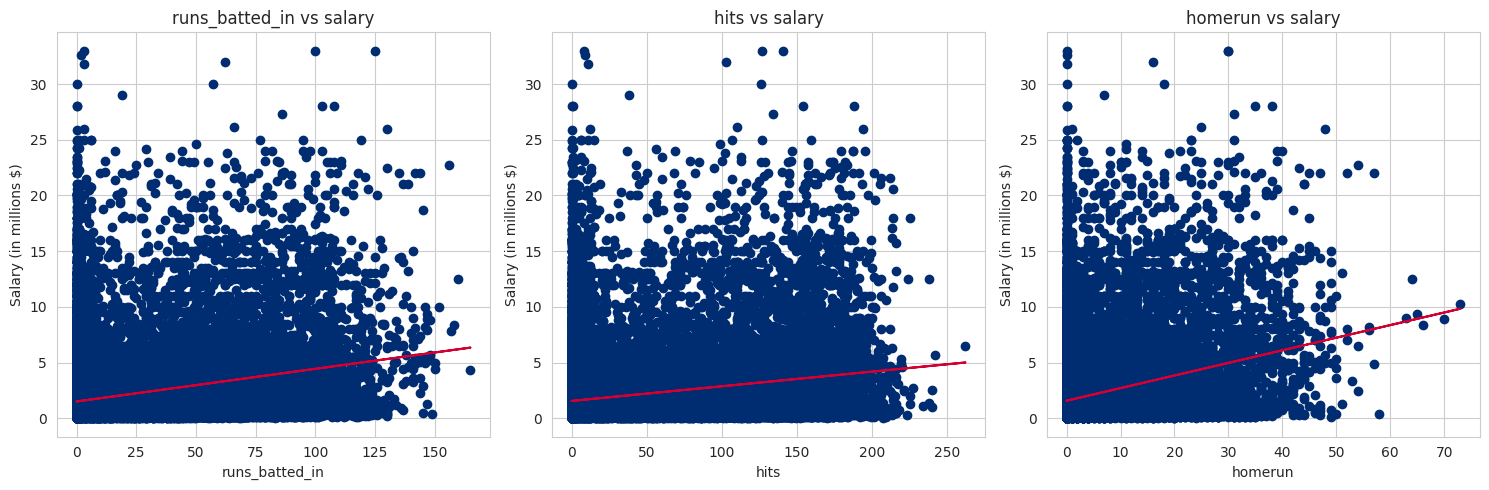

In [29]:
analyze(batter_salary, ['runs_batted_in', 'hits', 'homerun'])

Based on all three metrics, home runs have the highest correlation with salary followed by runs batted in (RBI) and then hits with values of 0.276, 0.253 and 0.215. All three metrics are positively correlated with salary, suggesting that better-performing performers tend to be more highly compensated.

### Question 3: Between, earned run average, wins, or strikeouts, which one has the highest correlation with pitcher salary?

<ipython-input-28-69ba600ccb00>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('The correlation between {} and salary is {:0.3f}'.format(statistic, record_df.corr()[statistic]['salary']))


The correlation between wins and salary is 0.259
The correlation between strikeouts and salary is 0.311
The correlation between earned_run_average and salary is -0.071


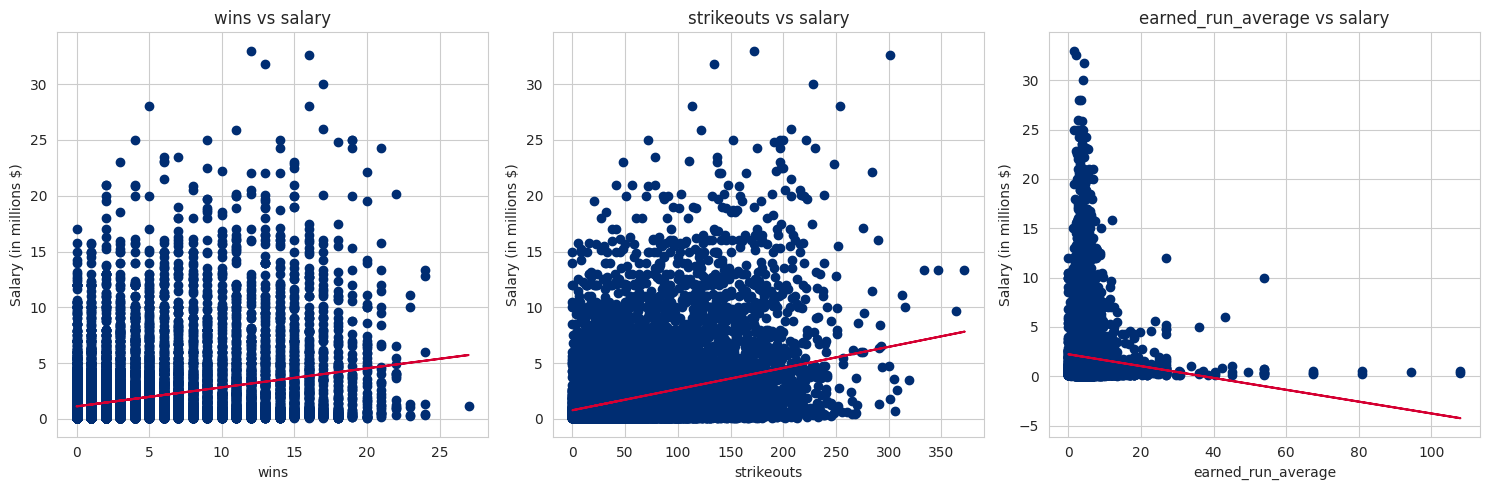

In [30]:
analyze(pitcher_salary, ['wins', 'strikeouts', 'earned_run_average'])

We can see that the strongest correlation is between Strikeouts and Salary with a correlation value of 0.311. We can also see that the correlation between Earned Run Average and Salary is slightly negative because a lower Earned Runs Average is better for a pitcher.

## Conclusion

Based on the above analysis can be concluded that:
1. Based on the median player salary, from 1985 to 2016 the baseball players salary increased almost fourfold from 400,000 USD to 1.9 million USD. And from 1985 to 2016, most American leagues had higher salaries than the Nation League, although the Nation League was several times superior but still a little distance.
2. The number of Home Runs has the highest correlation with Batter Salary compared to Runs Batted In and Hits.
3. The number of Strikeouts has the highest correlation with Pitcher Salary compared to Earned Run Average and Wins.